# **Nama : Damar Galih**

## **NIM  : 22.11.5209**

________________________________________________________________________________

# **Simple Linear Regression**

Simple linear regression atau regresi linear sederhana merupakan jenis regresi yang paling sederhana karena hanya melibatkan satu variabel bebas atau variabel independen X.

## **Dataset**

import library yang dibutuhkan.

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Me-load dataset ke dalam dataframe Pandas, kita dapat langsung menggunakan load_diabetes(). Argumen as_frame = True berfungsi agar kita dapat menggunakan ['frame'] untuk menampilkan data + target dalam satu dataframe.

In [4]:
# load dataset diabetes
data_diabetes = load_diabetes(as_frame=True)

# membuat dataframe
df = pd.DataFrame(data_diabetes['frame'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Melihat deskripsi dataset dengan ['DESCR'].

In [5]:
# Melihat deskripsi dataset diabetes

print(data_diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## **Analisis dan visualisasi data**

Scatter plot antara kolom bmi dan target.

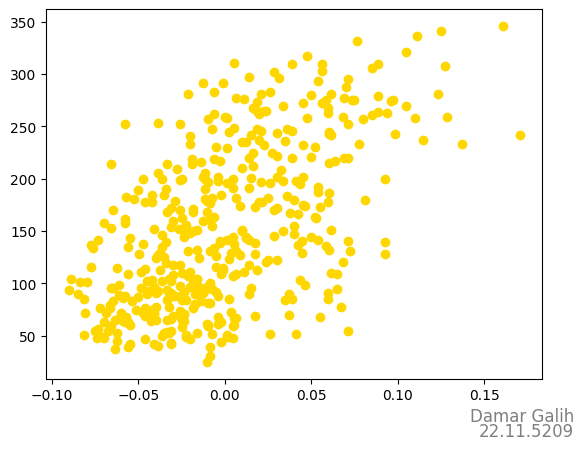

In [7]:
# Scatter plot kolom 'bmi' dan 'target'

fig = plt.gcf()
fig.text(0.95, 0.05, 'Damar Galih', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
fig.text(0.95, 0.02, '22.11.5209', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
plt.scatter(df['bmi'], df['target'], color='gold')
plt.show()

Mengikutsertakan kolom bp dalam plot sebagai warnanya.

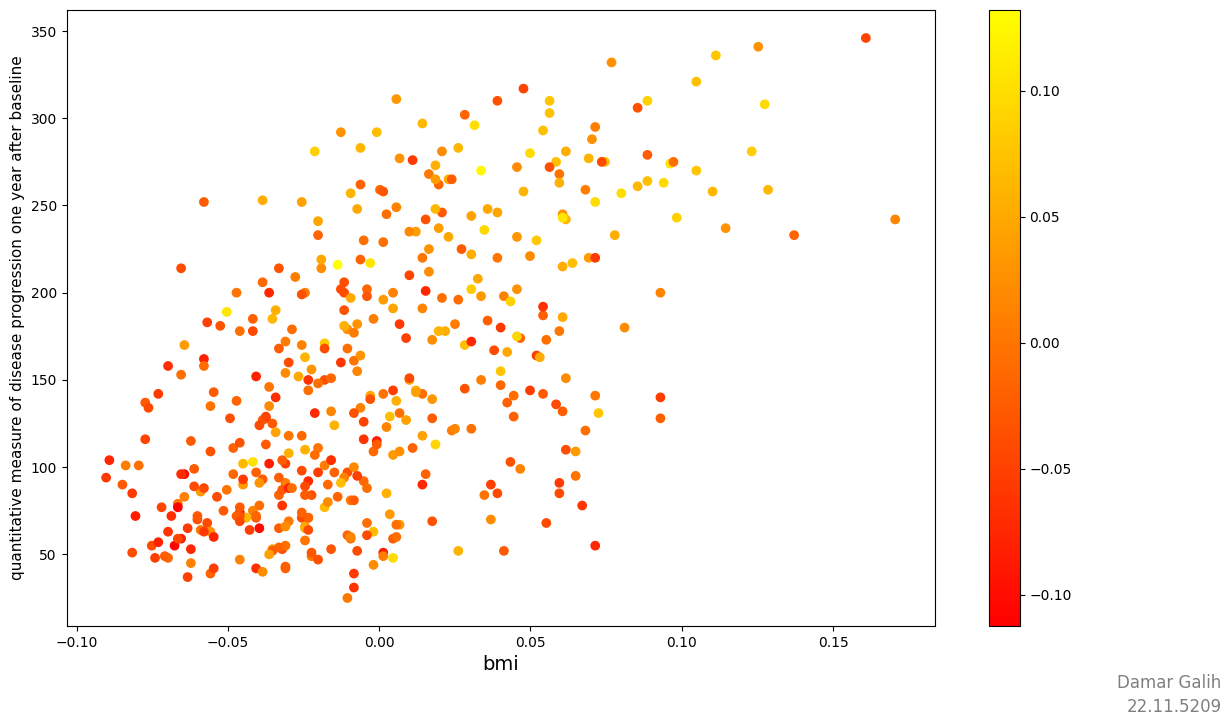

In [9]:
# Mengatur warna scatter plot dengan color map

fig, ax = plt.subplots(figsize=(14,8))
x = ax.scatter(df['bmi'], df['target'], c=df['bp'], cmap='autumn')

ax.set_xlabel('bmi', size=14)
ax.set_ylabel('quantitative measure of disease progression one year after baseline', size=11)

# Menambakan color bar
fig.colorbar(x)

fig = plt.gcf()
fig.text(0.95, 0.05, 'Damar Galih', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
fig.text(0.95, 0.02, '22.11.5209', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)

plt.show()

Korelasi antarkolom dengan heatmap.

<Figure size 1200x700 with 0 Axes>

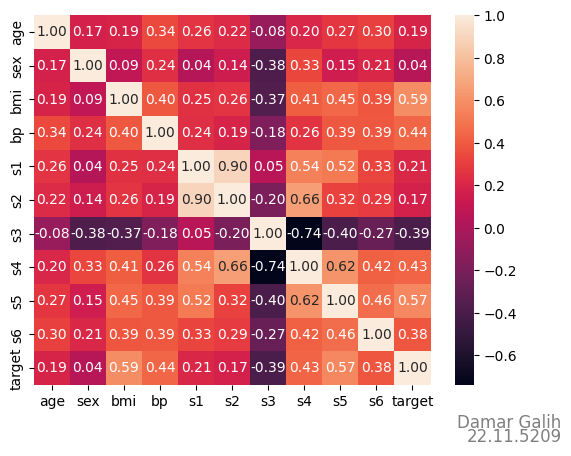

<Figure size 1200x700 with 0 Axes>

In [12]:
# Menampilkan korelasi antarkolom
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
fig = plt.gcf()
fig.text(0.95, 0.05, 'Damar Galih', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
fig.text(0.95, 0.02, '22.11.5209', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
plt.figure(figsize=(12,7))

## **Data Preparation**

Di bagian data preparation, kita perlu membagi data menjadi data train dan test.

In [13]:
# Membagi data train dan test

np.random.seed(42)
split = np.random.rand(len(df)) < 0.8
train = df[split]
test = df[~split]

Definisikan X_train, y_train, X_test, dan y_test.
Disini kita akan ambil fitur bmi.

In [14]:
# Mendefinisikan X_train, y_train, X_test, dan y_test

X_train = np.asanyarray(train[['bmi']])
y_train = np.asanyarray(train[['target']])

X_test = np.asanyarray(test[['bmi']])
y_test = np.asanyarray(test[['target']])

## **Modeling**

Membuat model linear regression dan melatihnya dengan .fit().

In [15]:
from sklearn.linear_model import LinearRegression

# Membuat dan melatih model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Menampilkan coefficient dengan atribut coef_ dan intercept dengan atribut
intercept_ .

In [16]:
# Coefficient dan Intercept
print ('Coefficients: ', lr_model.coef_)
print ('Intercept: ', lr_model.intercept_)

Coefficients:  [[958.28967126]]
Intercept:  [152.46395235]


Visualisasikan linear regression dengan scatter plot.

<Figure size 1200x700 with 0 Axes>

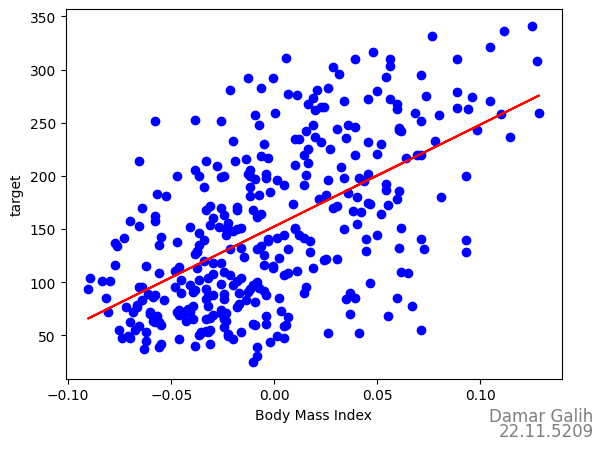

<Figure size 1200x700 with 0 Axes>

In [18]:
# Visualisasi dengan scatter plot

plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, lr_model.coef_[0][0]*X_train + lr_model.intercept_[0], '-r')
plt.xlabel('Body Mass Index')
plt.ylabel('target')
fig = plt.gcf()
fig.text(0.95, 0.05, 'Damar Galih', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
fig.text(0.95, 0.02, '22.11.5209', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
plt.figure(figsize=(12,7))

Uji model dengan menggunakan data X_test .

In [19]:
# Menguji model dengan X_test

y_pred = lr_model.predict(X_test)

print('Data asli: \n', y_test[0:10])
print('\n')
print('Hasil prediksi: \n', y_pred[0:10])

Data asli: 
 [[ 75.]
 [ 63.]
 [ 69.]
 [179.]
 [ 87.]
 [ 65.]
 [102.]
 [ 92.]
 [155.]
 [ 59.]]


Hasil prediksi: 
 [[103.13689113]
 [150.64827531]
 [169.23968652]
 [124.82687086]
 [104.1697473 ]
 [ 91.77547317]
 [122.76115851]
 [129.99115175]
 [145.48399442]
 [143.41828207]]


Evaluasi kinerja model dengan mean_absolute_error dan mean_squared_error

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menampilkan MAE dan MSE
print('Mean Absolute Error (MAE): %.2f' % mean_absolute_error(y_pred, y_test))
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(y_pred, y_test))

Mean Absolute Error (MAE): 51.84
Mean Squared Error (MSE): 3694.70


# **QUIZ**

Import csv dan tampilkan data.

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path = "/content/pemupukan_hasil_panen.csv"
data = pd.read_csv(path)
data.head(10)

,Pemupukan,Hasil_panen
0,3,12
1,6,23
2,9,24
3,10,26
4,13,28
5,16,30
6,19,33
7,20,34
8,23,37
9,24,39


Visualkan data dengan scatter plot.

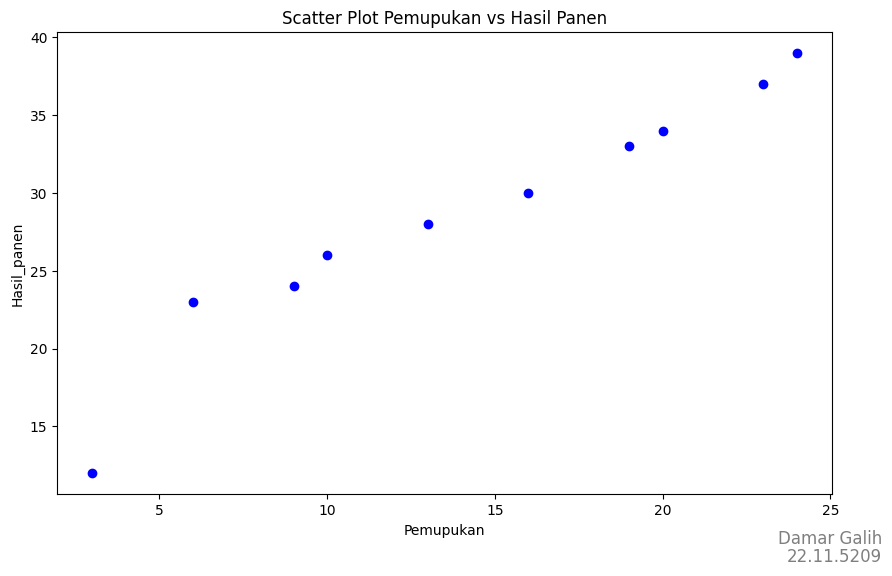

<Figure size 1200x700 with 0 Axes>

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Pemupukan'], df['Hasil_panen'], color='blue')
plt.xlabel('Pemupukan')
plt.ylabel('Hasil_panen')
plt.title('Scatter Plot Pemupukan vs Hasil Panen')
fig = plt.gcf()
fig.text(0.95, 0.05, 'Damar Galih', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
fig.text(0.95, 0.02, '22.11.5209', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
plt.figure(figsize=(12,7))
plt.show()

Hitung nilai koefisien Korelasinya.

In [45]:
correlation = df['Pemupukan'].corr(df['Hasil_panen'])
print(f"Koefisien Korelasi: {correlation}")

Koefisien Korelasi: 0.9651464563336631


Buat model Regresinya.

In [46]:
from sklearn.linear_model import LinearRegression
X = df[['Pemupukan']]
y = df['Hasil_panen']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Prediksi hasil panen dengan data jumlah pemupukan berikut: 27,30,35.

In [47]:
prediksi_data = pd.DataFrame({'Pemupukan': [27, 30, 35]})
prediksi_hasil = model.predict(prediksi_data)
print(f"Prediksi hasil panen untuk pemupukan 27, 30, 35: {prediksi_hasil}")

Prediksi hasil panen untuk pemupukan 27, 30, 35: [42.0021182  45.16797289 50.44439737]


Nilai MAE dan MSE dari model regresi yang sudah di buat.

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 1.4050413048083044
Mean Squared Error (MSE): 3.865706418131751


Visualisasi hasil regresi.

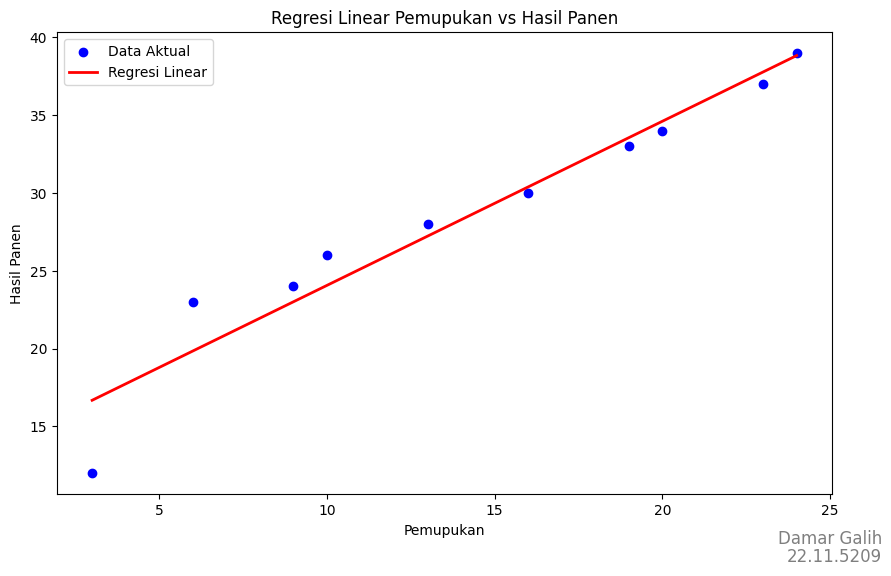

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Pemupukan'], df['Hasil_panen'], color='blue', label='Data Aktual')
plt.plot(df['Pemupukan'], y_pred, color='red', linewidth=2, label='Regresi Linear')
plt.xlabel('Pemupukan')
plt.ylabel('Hasil Panen')
plt.title('Regresi Linear Pemupukan vs Hasil Panen')
fig = plt.gcf()
fig.text(0.95, 0.05, 'Damar Galih', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
fig.text(0.95, 0.02, '22.11.5209', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
plt.legend()
plt.show()